In [4]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import models, layers

In [11]:
def extract_features(file_path):
    y,sr = librosa.load(file_path, duration=30)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_scaled = np.mean(mfcc.T, axis=0)
    return mfcc_scaled

In [18]:
import os

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
dataset_path = r"C:\Users\Kartik\Data Science Course\Music Genre Classification\archive\genres"

for genre in genres:
    folder = os.path.join(dataset_path, genre)
    print(f"Processing folder: {folder}")
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)   # full path to each .wav file
        data = extract_features(file_path)
        features.append([data, genre])

df = pd.DataFrame(features, columns=['feature', 'label'])

Processing folder: C:\Users\Kartik\Data Science Course\Music Genre Classification\archive\genres\blues
Processing folder: C:\Users\Kartik\Data Science Course\Music Genre Classification\archive\genres\classical
Processing folder: C:\Users\Kartik\Data Science Course\Music Genre Classification\archive\genres\country
Processing folder: C:\Users\Kartik\Data Science Course\Music Genre Classification\archive\genres\disco
Processing folder: C:\Users\Kartik\Data Science Course\Music Genre Classification\archive\genres\hiphop
Processing folder: C:\Users\Kartik\Data Science Course\Music Genre Classification\archive\genres\jazz
Processing folder: C:\Users\Kartik\Data Science Course\Music Genre Classification\archive\genres\metal
Processing folder: C:\Users\Kartik\Data Science Course\Music Genre Classification\archive\genres\pop
Processing folder: C:\Users\Kartik\Data Science Course\Music Genre Classification\archive\genres\reggae
Processing folder: C:\Users\Kartik\Data Science Course\Music Genre C

In [19]:
X = np.array(df['feature'].tolist())
y = np.array(df['label'].tolist())

encoder = LabelEncoder()
y = encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(40,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3332 - loss: 1.8843 - val_accuracy: 0.4500 - val_loss: 1.4791
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5086 - loss: 1.3787 - val_accuracy: 0.5810 - val_loss: 1.1488
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6125 - loss: 1.1146 - val_accuracy: 0.6828 - val_loss: 0.9554
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6694 - loss: 0.9561 - val_accuracy: 0.7017 - val_loss: 0.8172
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7142 - loss: 0.8291 - val_accuracy: 0.7362 - val_loss: 0.7338
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7384 - loss: 0.7546 - val_accuracy: 0.7707 - val_loss: 0.6480
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7746 - loss: 0.6444 - val_accuracy: 0.7966 - val_loss: 0.5897
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7957 - loss: 0.5945 - val_accuracy: 0.8086 - val_loss

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9897 - loss: 0.0980 
Test Accuracy: 0.99


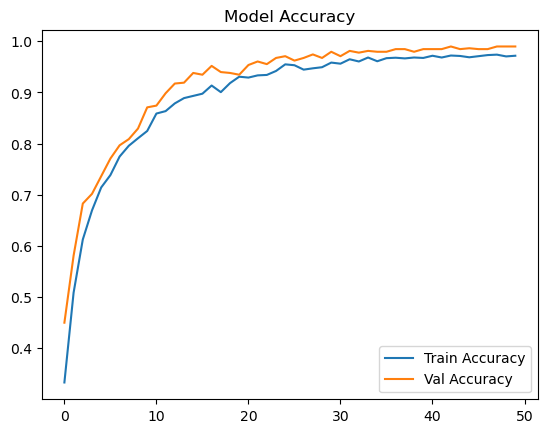

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,896 (612.88 KB)

 Trainable params: 52,298 (204.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,598 (408.59 KB)